# Employee Staffing Optimization

## Context

To ensure long-term financial sustainability, Canada Post has to optimize its staffing to meet the demand. Canada Post relies on workforce to carry out its operations. To achieve the goal of delivering on-time, Canada Post wants to plan its workforce and attendence effectively

## Objective

we will conduct data preparation and exploratory data analysis (EDA) to uncover key patterns, relationships, and insights within the dataset. Through this EDA results, we aim to develop few Machine Learning models and select an optimized model for staffing optimization. 

**Data Dictionary**

* **CALENDAR_DATE**: Date of the recorded data
* **NATIONAL_HOLIDAY_IND**: Indicator for whether it's a national holiday (Yes/No)
* **PROVINCIAL_HOLIDAY_IND**: Indicator for whether it's a provincial holiday (Yes/No)
* **IMPACT_DAY_FLG**: Flag indicating if it's an impact day
* **DAY_OF_WEEK**: Day of the week (e.g., Monday, Tuesday, etc.)
* **WEEK_OF_YEAR**: Week number within the year
* **DAY_OF_MONTH**: Day of the month
* **MONTH_NO**: Numeric representation of the month
* **YEAR_NO**: Numeric representation of the year
* **COST_CENTRE_ID**: Identifier for the cost center
* **PEAK**: Indicator for peak time
* **SITE_PROVINCE_CODE**: Province code for the site (BC)
* **ACTUAL_VOLUME**: Recorded volume of data
* **PLANT_NAME_EN**: Name of the plant in English
* **PCR_CC_ROLLUP**: Rollup of the cost center for PCR
* **PCR_CC_CITY**: City associated with the cost center
* **PCR_CC_POSTAL_CODE**: Postal code associated with the cost center

In [35]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
import pandas as pd
# Load the Excel file into a DataFrame
df = pd.read_excel(r'CanadaPost_WorkLoad.xlsx', sheet_name='Merge by Date')


In [37]:
# Display the first few rows of the DataFrame

print(df.head())

        Date  Workload sum  Scheduled_Hours  Planned_Absences  \
0 2019-01-01             8             0.00              0.00   
1 2019-01-02         40804          8885.90           1195.23   
2 2019-01-03         42189          9656.08           1218.42   
3 2019-01-04         44384          8795.96           1269.42   
4 2019-01-05            11          4354.98            575.00   

   Unplanned_Absences  Unpaid_Absences  Max Temp (°C)  Max Temp Flag  \
0                0.00             0.00            5.3              0   
1              647.96           296.59            5.5              0   
2              562.20           283.91            9.5              0   
3              578.67           277.13           10.4              0   
4              305.32           132.69            8.7              0   

   Min Temp (°C)  Min Temp Flag  ...  Total Snow (cm)  Total Snow Flag  \
0            0.8              0  ...              0.0                0   
1            2.4            

In [38]:
# Get information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1870 non-null   datetime64[ns]
 1   Workload sum               1870 non-null   int64         
 2   Scheduled_Hours            1870 non-null   float64       
 3   Planned_Absences           1870 non-null   float64       
 4   Unplanned_Absences         1870 non-null   float64       
 5   Unpaid_Absences            1870 non-null   float64       
 6   Max Temp (°C)              1870 non-null   float64       
 7   Max Temp Flag              1870 non-null   int64         
 8   Min Temp (°C)              1870 non-null   float64       
 9   Min Temp Flag              1870 non-null   int64         
 10  Mean Temp (°C)             1870 non-null   float64       
 11  Mean Temp Flag             1870 non-null   int64         
 12  Heat D

In [39]:
# Summary statistics for numerical columns
print(df.describe())


        Workload sum  Scheduled_Hours  Planned_Absences  Unplanned_Absences  \
count    1870.000000      1870.000000       1870.000000         1870.000000   
mean    19014.514439      7182.622225        890.299733          799.127021   
std     23736.842212      2743.675036        473.144171          503.305719   
min         0.000000         0.000000          0.000000            0.000000   
25%         0.000000      5199.755000        548.115000          492.982500   
50%        10.500000      8278.350000        876.800000          666.135000   
75%     38853.500000      9272.440000       1214.112500         1008.670000   
max    102848.000000     19342.740000       3203.740000         3697.800000   

       Unpaid_Absences  Max Temp (°C)  Max Temp Flag  Min Temp (°C)  \
count      1870.000000    1870.000000    1870.000000    1870.000000   
mean        235.116519       8.341925       0.008556       4.000695   
std         133.721086       8.632226       0.092128       5.670104   
min 

In [40]:
# Check dimensions of the dataset
print("Dimensions of the dataset:", df.shape)


Dimensions of the dataset: (1870, 28)


Summary statistics for numerical columns:
        Workload sum  Scheduled_Hours  Planned_Absences  Unplanned_Absences  \
count    1870.000000      1870.000000       1870.000000         1870.000000   
mean    19014.514439      7182.622225        890.299733          799.127021   
std     23736.842212      2743.675036        473.144171          503.305719   
min         0.000000         0.000000          0.000000            0.000000   
25%         0.000000      5199.755000        548.115000          492.982500   
50%        10.500000      8278.350000        876.800000          666.135000   
75%     38853.500000      9272.440000       1214.112500         1008.670000   
max    102848.000000     19342.740000       3203.740000         3697.800000   

       Unpaid_Absences  Max Temp (°C)  Max Temp Flag  Min Temp (°C)  \
count      1870.000000    1870.000000    1870.000000    1870.000000   
mean        235.116519       8.341925       0.008556       4.000695   
std         133.721086       8.63

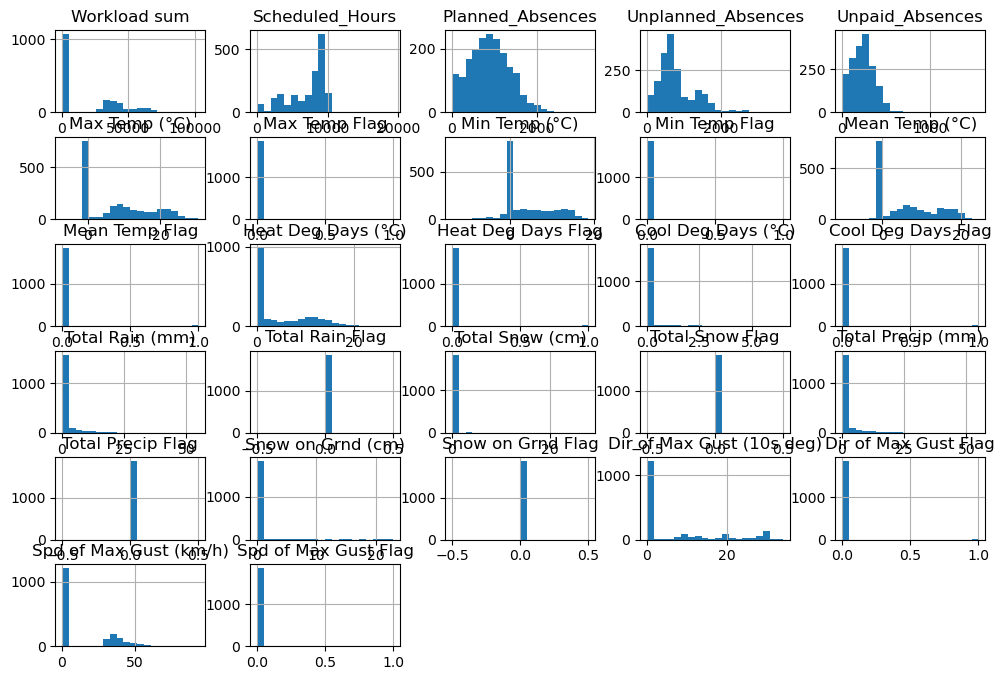

In [41]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Analyze the distribution of numerical variables
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.show()


In [27]:
# Check the unique values in the 'CALENDAR_DATE' column
print("Unique values in the 'Date' column:")
print(df['Date'].unique())


Unique values in the 'Date' column:
['2019-01-01T00:00:00.000000000' '2019-01-02T00:00:00.000000000'
 '2019-01-03T00:00:00.000000000' ... '2024-02-11T00:00:00.000000000'
 '2024-02-12T00:00:00.000000000' '2024-02-13T00:00:00.000000000']


In [42]:
df['Total_Hours_Worked'] = df['Scheduled_Hours'] - df['Planned_Absences'] - df['Unplanned_Absences'] - df['Unpaid_Absences']
df

,Date,Workload sum,Scheduled_Hours,Planned_Absences,Unplanned_Absences,Unpaid_Absences,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,...,Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,Total_Hours_Worked
0,2019-01-01,8,0.00,0.00,0.00,0.00,5.3,0,0.8,0,...,0,0.0,0,0,0,0,0,0,0,0.00
1,2019-01-02,40804,8885.90,1195.23,647.96,296.59,5.5,0,2.4,0,...,0,3.4,0,0,0,6,0,41,0,6746.12
2,2019-01-03,42189,9656.08,1218.42,562.20,283.91,9.5,0,4.5,0,...,0,54.8,0,0,0,14,0,54,0,7591.55
3,2019-01-04,44384,8795.96,1269.42,578.67,277.13,10.4,0,6.1,0,...,0,9.6,0,0,0,15,0,45,0,6670.74
4,2019-01-05,11,4354.98,575.00,305.32,132.69,8.7,0,5.3,0,...,0,3.2,0,0,0,10,0,33,0,3341.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,2024-02-09,26920,6482.00,983.24,493.88,298.89,7.0,0,-0.5,0,...,0,0.0,0,0,0,0,0,0,0,4705.99
1866,2024-02-10,6,2645.00,424.75,176.87,107.12,8.0,0,2.3,0,...,0,1.9,0,0,0,0,0,0,0,1936.26
1867,2024-02-11,0,4663.25,844.42,320.37,139.12,7.5,0,4.8,0,...,0,21.9,0,0,0,0,0,0,0,3359.34
1868,2024-02-12,56336,7542.89,1119.46,418.72,251.95,8.0,0,4.0,0,...,0,7.4,0,0,0,29,0,44,0,5752.76


In [30]:
# Check for null values in all columns
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Date                         0
Workload sum                 0
Scheduled_Hours              0
Planned_Absences             0
Unplanned_Absences           0
Unpaid_Absences              0
Max Temp (°C)                0
Max Temp Flag                0
Min Temp (°C)                0
Min Temp Flag                0
Mean Temp (°C)               0
Mean Temp Flag               0
Heat Deg Days (°C)           0
Heat Deg Days Flag           0
Cool Deg Days (°C)           0
Cool Deg Days Flag           0
Total Rain (mm)              0
Total Rain Flag              0
Total Snow (cm)              0
Total Snow Flag              0
Total Precip (mm)            0
Total Precip Flag            0
Snow on Grnd (cm)            0
Snow on Grnd Flag            0
Dir of Max Gust (10s deg)    0
Dir of Max Gust Flag         0
Spd of Max Gust (km/h)       0
Spd of Max Gust Flag         0
Total_Hours_Worked           0
dtype: int64


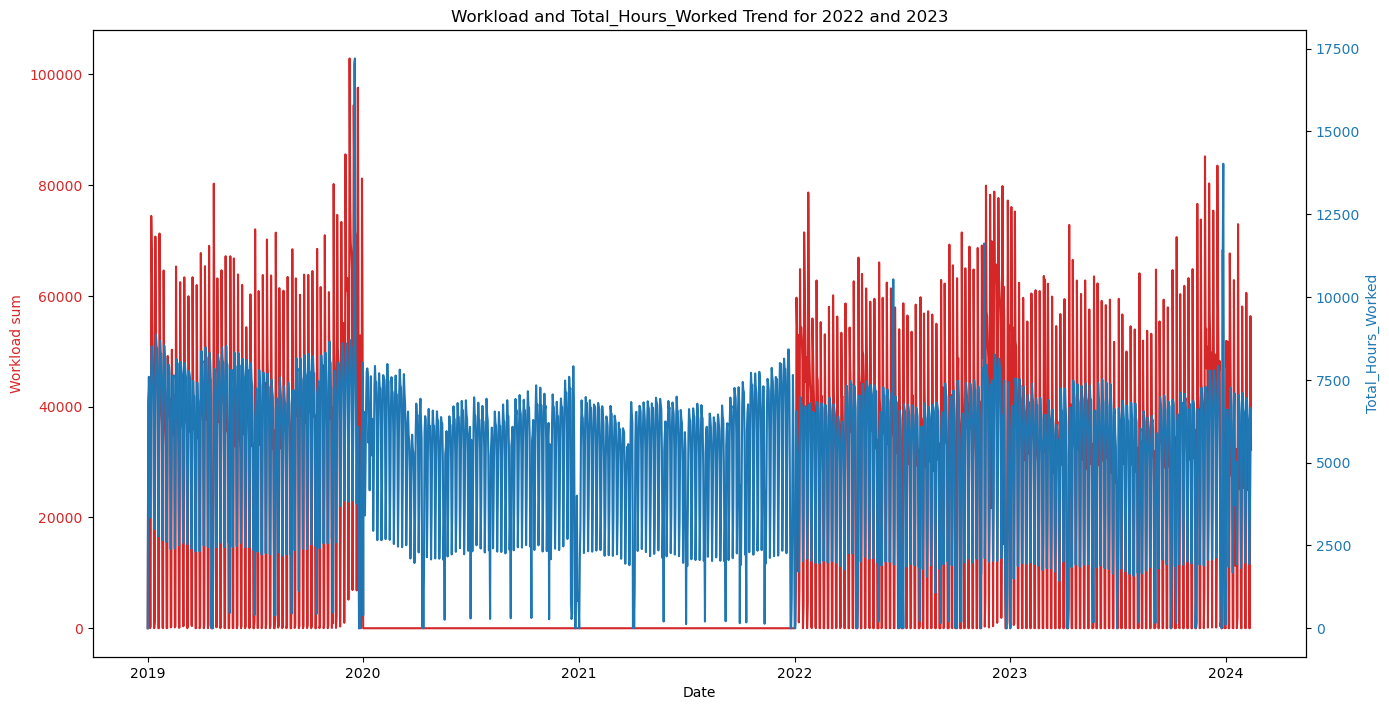

In [59]:
# Filtering the DataFrame for the years 2022 and 2023
#df_filtered = df_merge_by_date.loc['2022':'2023']

# Plotting trends for "Workload sum" and "Scheduled Hours (Sum)" for 2022 and 2023
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Workload sum', color=color)
ax1.plot(df.index, df['Workload sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total_Hours_Worked', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df['Total_Hours_Worked'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Workload and Total_Hours_Worked Trend for 2022 and 2023')
plt.show()


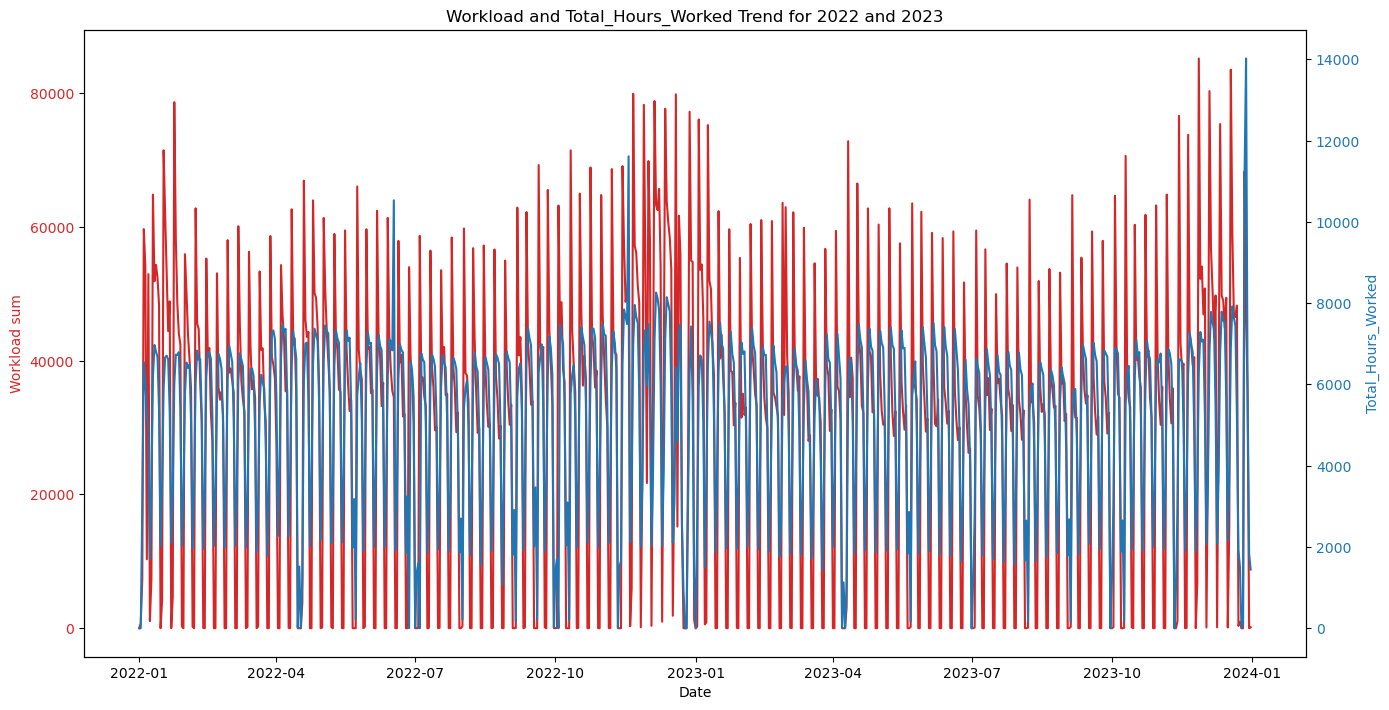

In [65]:
# Filtering the DataFrame for the years 2022 and 2023
#df1 = df['2019','2022','2023']
years = [2022, 2023]
df1 = df[df.index.year.isin(years)]

# Plotting trends for "Workload sum" and "Scheduled Hours (Sum)" for 2022 and 2023
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Workload sum', color=color)
ax1.plot(df1.index, df1['Workload sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total_Hours_Worked', color=color)  # we already handled the x-label with ax1
ax2.plot(df1.index, df1['Total_Hours_Worked'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Workload and Total_Hours_Worked Trend for 2022 and 2023')
plt.show()


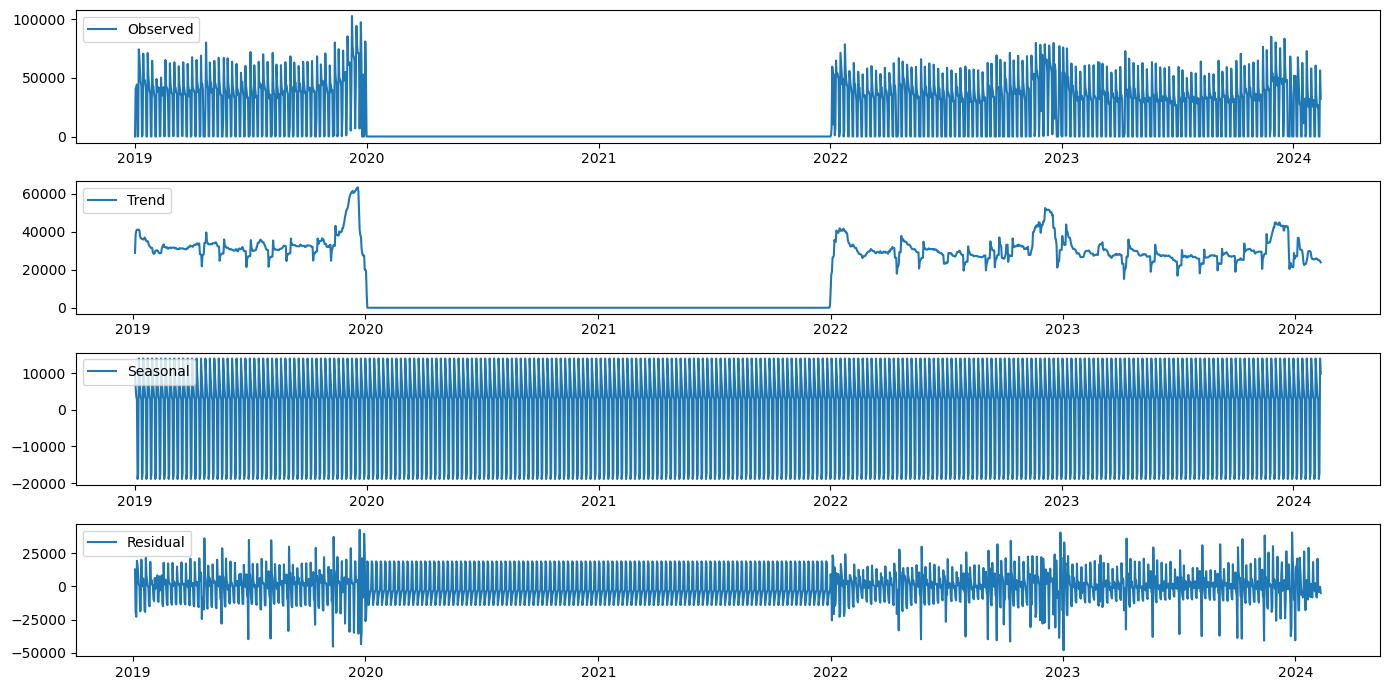

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Choose your time series column
time_series_column = 'Workload sum'  # Or any other column you're interested in

# Decompose the time series
# The model can be 'additive' or 'multiplicative', depending on the nature of the seasonal variation
decomposition = seasonal_decompose(df[time_series_column], model='additive')

# Plotting the decomposed time series components
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

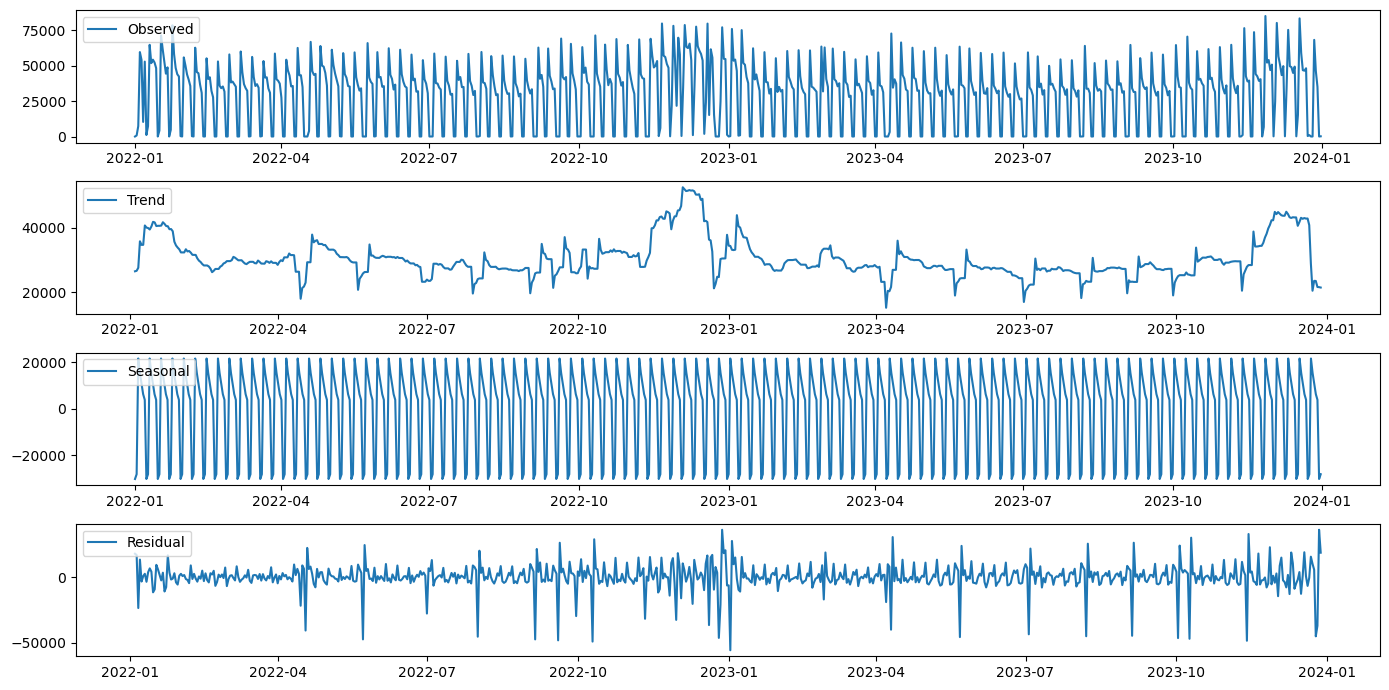

In [62]:

# Choose your time series column
time_series_column = 'Workload sum'  # Or any other column you're interested in

# Filter the DataFrame for the years 2019, 2022, 2023, and 2024
years = [2019, 2022, 2023]
df_filtered = df1[df1.index.year.isin(years)]

# Decompose the time series
# The model can be 'additive' or 'multiplicative', depending on the nature of the seasonal variation
decomposition = seasonal_decompose(df_filtered[time_series_column])

# Plotting the decomposed time series components
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

In [66]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Assuming 'df_merge_by_date' is already loaded and includes a 'Total Hours Worked' column
# If 'Total Hours Worked' needs to be recalculated or is not present, it should be added to the DataFrame as done previously

# Preparing the dataset for ARIMAX
# Assuming 'Workload sum' is the main time series, 'Total Hours Worked' and 'Max Temp (°C)' as exogenous variables

# Since we're using ARIMA model from statsmodels, it requires the exog data to be in DataFrame format
exog_variables = df1[['Total_Hours_Worked', 'Max Temp (°C)']]

# Fitting the ARIMA model (with exogenous variables)
model2 = ARIMA(df1['Workload sum'], exog=exog_variables, order=(1,1,1))
arimax = model2.fit()

# Print the model summary
arimax_summary = arimax.summary()
arimax_summary

C:\Users\mahes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mahes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mahes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Workload sum   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7975.236
Date:                Thu, 14 Mar 2024   AIC                          15960.472
Time:                        09:58:45   BIC                          15983.431
Sample:                    01-01-2022   HQIC                         15969.330
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Total_Hours_Worked     8.1483      0.185     44.023      0.000       7.786       8.511
Max Temp (°C)         33.4854    123.747      0.271      0.787    -209.054     276.025
ar.L1                 -0.2110      0.051     -4.150      0.000      -0.311      -0.111
ma.L1                 -0.9397      0.017    -53.709      0.000      -0.974      -0.905
sigma2              2.121e+08      0.000   1.06e+12      0.000    2.12e+08    2.12e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):               450.46
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.92
Prob(H) (two-sided):                  0.83   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.88e+27. Standard errors may be unstable.
"""

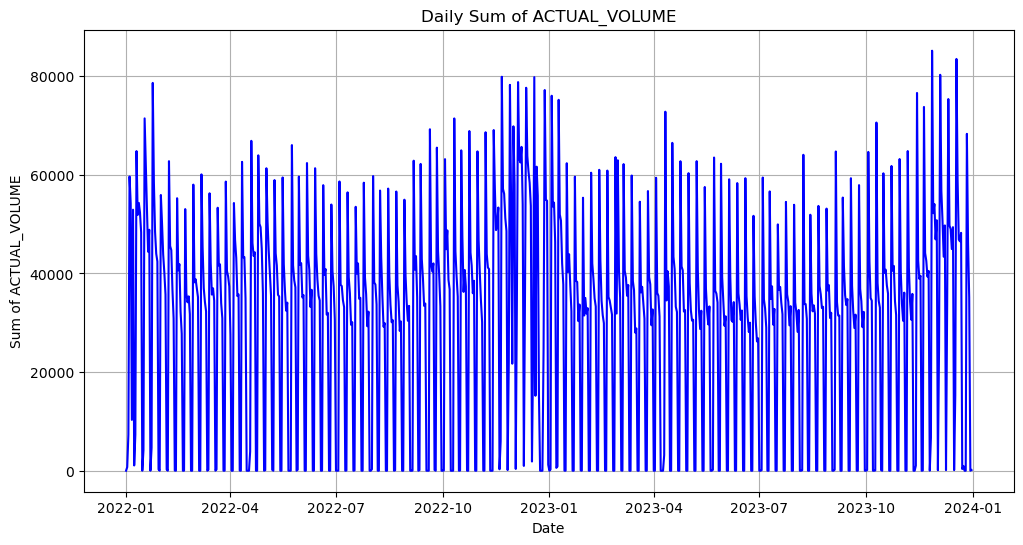

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df_subset = df.loc['2022':'2023']

# Assuming df is your original DataFrame with 'CALENDAR_DATE' as the index
# Calculate the sum of 'ACTUAL_VOLUME' for each day
daily_volume_sum = df_subset.groupby(df_subset.index.date)['ACTUAL_VOLUME'].sum()

# Convert the daily_volume_sum Series to DataFrame and rename the column
daily_volume_sum_df = daily_volume_sum.to_frame(name='daily_volume_sum')

# Merge the daily_volume_sum DataFrame with the original DataFrame
df_merged = df_subset.merge(daily_volume_sum_df, left_index=True, right_index=True)

# Plot the 'daily_volume_sum' column
plt.figure(figsize=(12, 6))
plt.plot(df_merged.index, df_merged['daily_volume_sum'], color='blue')
plt.title('Daily Sum of ACTUAL_VOLUME')
plt.xlabel('Date')
plt.ylabel('Sum of ACTUAL_VOLUME')
plt.grid(True)
plt.show()

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert index to DatetimeIndex if not already in datetime format
df_subset.index = pd.to_datetime(df_subset.index, format='%Y-%m-%d')

# Group by index and calculate the sum of 'ACTUAL_VOLUME' for each day
daily_volume_sum = df_subset.groupby(df_subset.index.date)['ACTUAL_VOLUME'].sum()

# Adjust the period based on the available data
# Let's assume you want to set the period as the number of observations per year for the available years
observations_per_year = 15695
total_observations_available_years = 47085  # for 2019, 2022, and 2023
total_observations_2024 = 1892

period_available_years = observations_per_year
period_2024 = total_observations_2024

# Perform seasonal decomposition with adjusted period for each year
decomposed_available_years = seasonal_decompose(df_subset.loc['2022':'2023']['daily_volume_sum'], period=period_available_years)

KeyError: 'daily_volume_sum'

In [75]:
trend = decomposed_available_years.trend
seasonal = decomposed_available_years.seasonal
residual = decomposed_available_years.resid

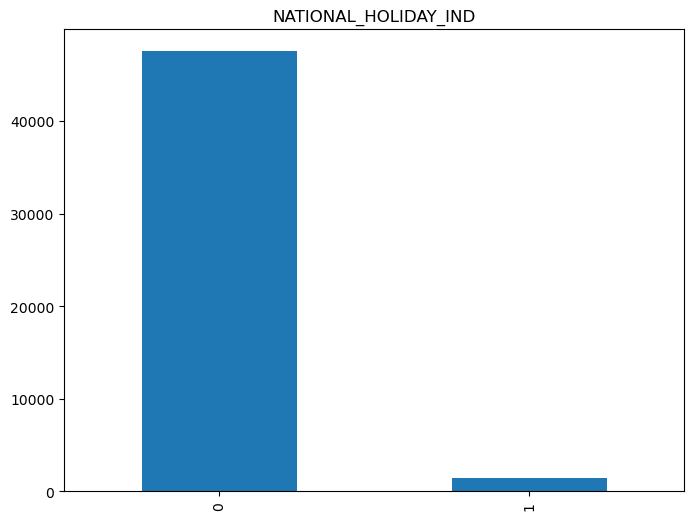

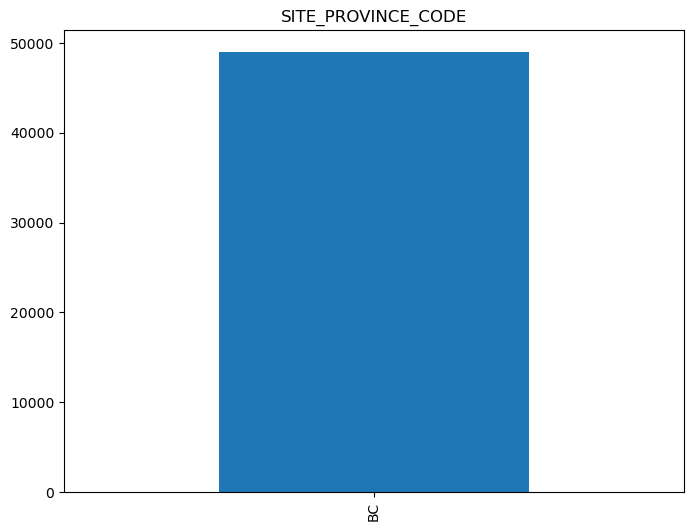

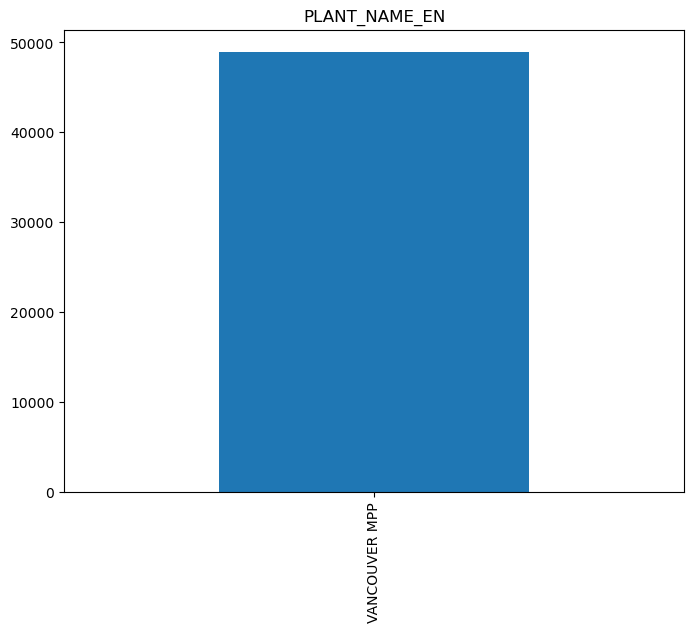

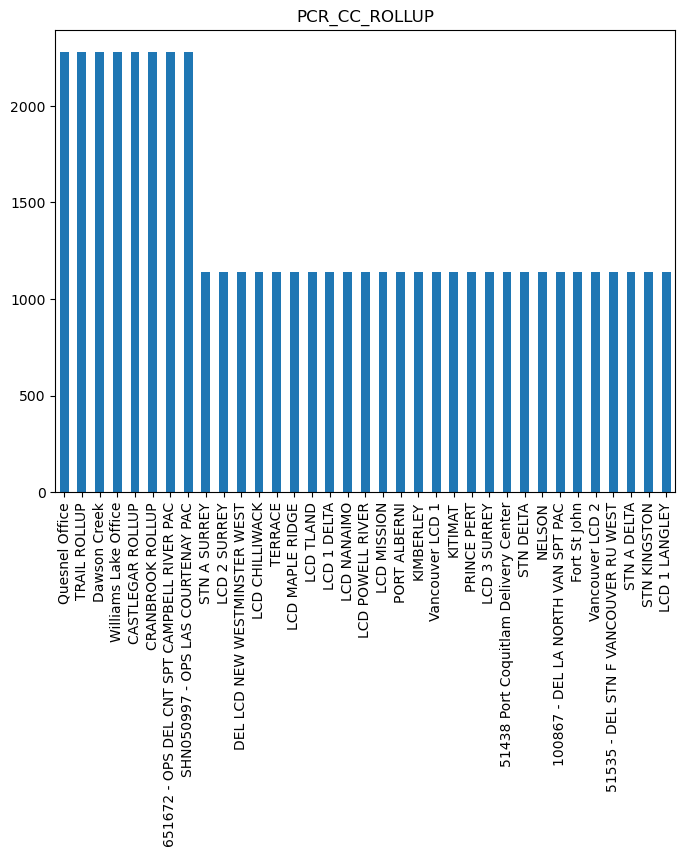

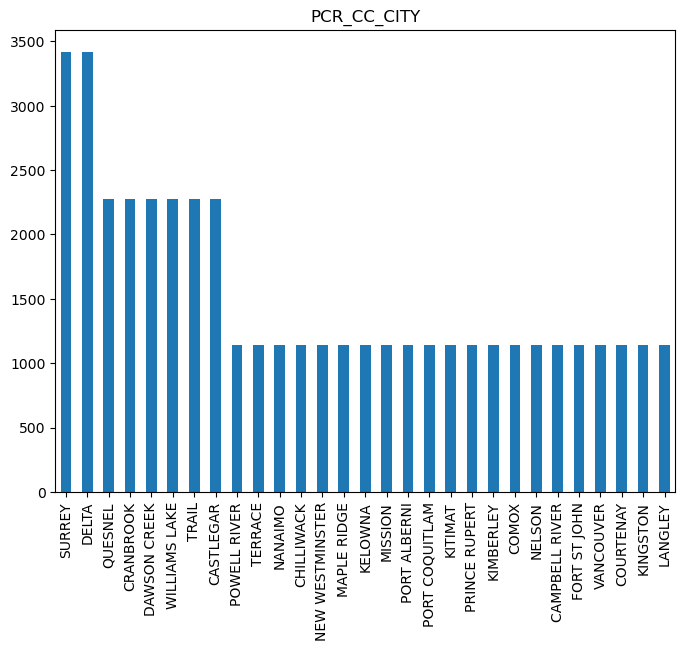

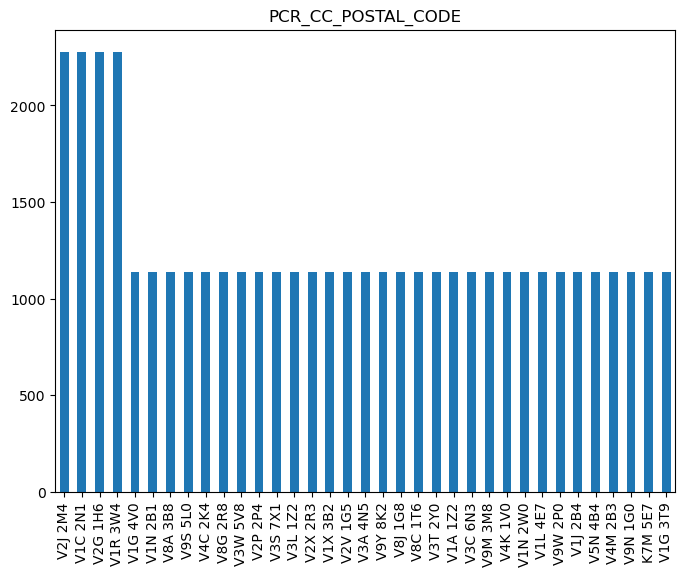

In [21]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6), title=col)
    plt.show()


In [14]:
correlation_matrix = df.corr()
print(correlation_matrix)


                        PROVINCIAL_HOLIDAY_IND  IMPACT_DAY_FLG   DAY_OF_WEEK  \
PROVINCIAL_HOLIDAY_IND            1.000000e+00   -9.676258e-03 -5.127649e-02   
IMPACT_DAY_FLG                   -9.676258e-03    1.000000e+00 -4.551590e-02   
DAY_OF_WEEK                      -5.127649e-02   -4.551590e-02  1.000000e+00   
WEEK_OF_YEAR                      1.981267e-02    1.063541e-01 -1.151933e-02   
DAY_OF_MONTH                     -6.589969e-02   -1.398629e-02 -5.952319e-03   
MONTH_NO                          2.440757e-02    1.072175e-01  7.497471e-03   
YEAR_NO                          -3.035523e-03   -3.326994e-02 -2.076908e-03   
COST_CENTRE_ID                   -1.650311e-17    6.361524e-17 -1.788973e-15   
PEAK                             -2.457534e-02    1.332392e-01  3.094123e-03   
ACTUAL_VOLUME                    -3.041576e-02    3.030927e-02 -7.444368e-02   

                        WEEK_OF_YEAR  DAY_OF_MONTH      MONTH_NO  \
PROVINCIAL_HOLIDAY_IND  1.981267e-02 -6.589969e-02 

C:\Users\jaish\AppData\Local\Temp\ipykernel_3104\1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


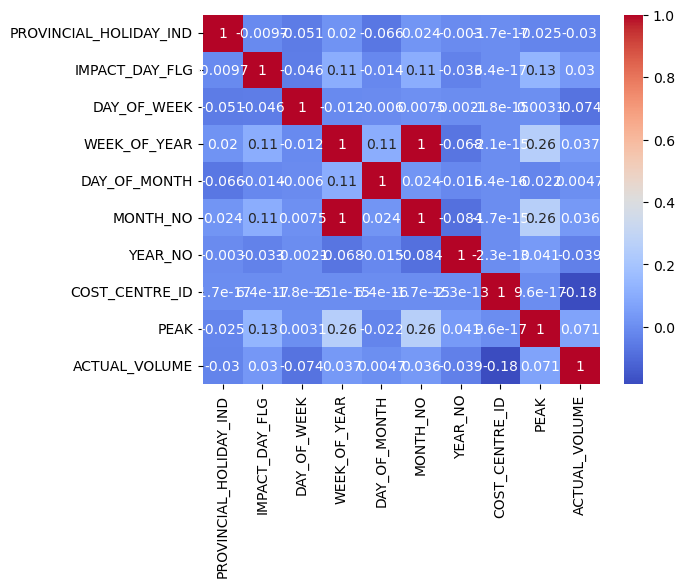

In [15]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [17]:
# Examine the frequency and distribution of holiday indicators
holiday_freq = df['NATIONAL_HOLIDAY_IND'].value_counts()
print("Frequency of National Holiday Indicators:")
print(holiday_freq)

holiday_dist = df.groupby('NATIONAL_HOLIDAY_IND').size() / len(df)
print("\nDistribution of National Holiday Indicators:")
print(holiday_dist)

Frequency of National Holiday Indicators:
0    47515
1     1462
Name: NATIONAL_HOLIDAY_IND, dtype: int64

Distribution of National Holiday Indicators:
NATIONAL_HOLIDAY_IND
0    0.970129
1    0.029850
dtype: float64


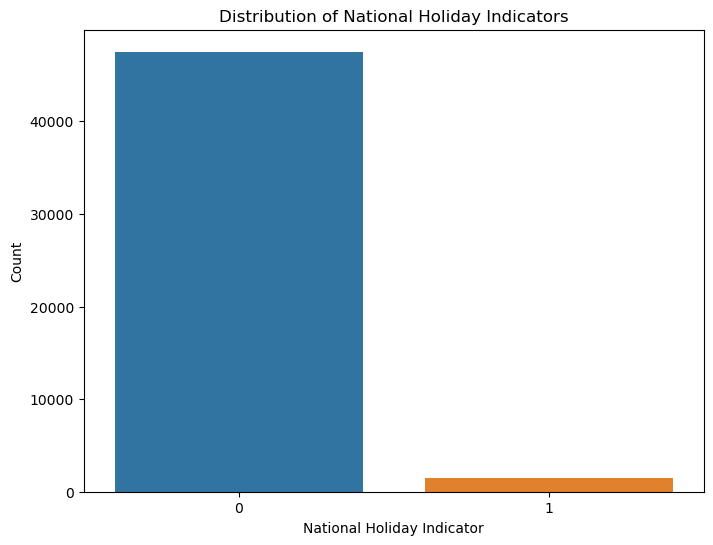

In [18]:
# Visualize the distribution of holiday indicators
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NATIONAL_HOLIDAY_IND')
plt.title('Distribution of National Holiday Indicators')
plt.xlabel('National Holiday Indicator')
plt.ylabel('Count')
plt.show()

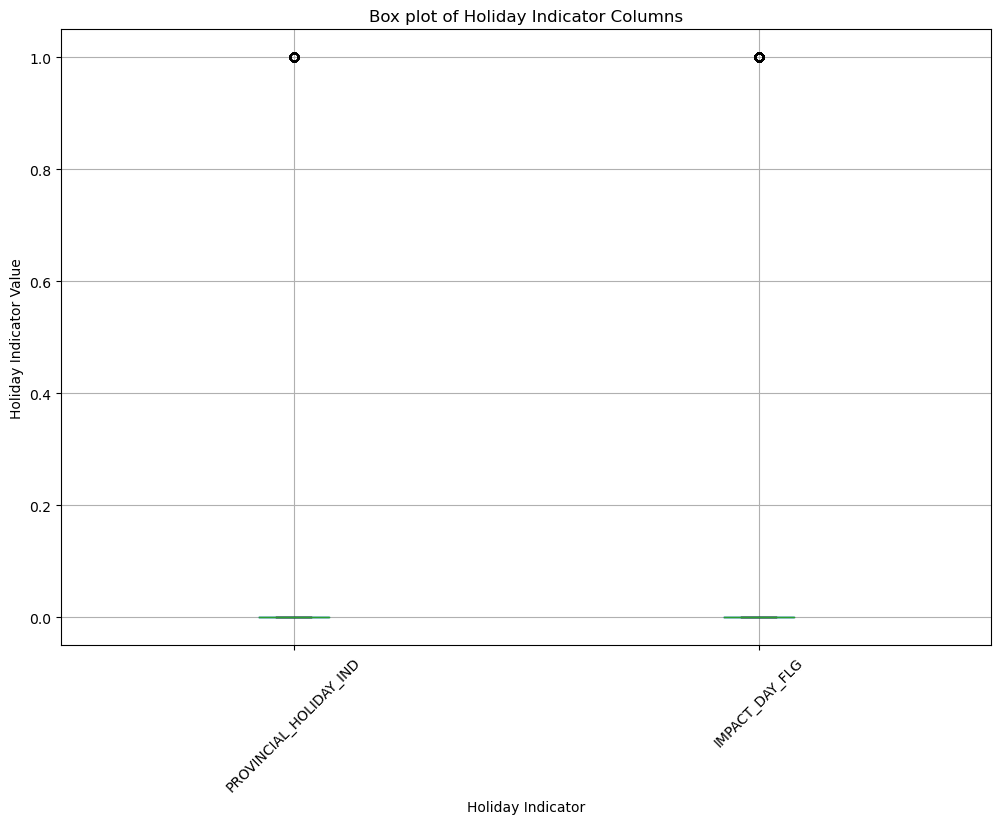

In [23]:
# Select holiday indicator columns
holiday_indicator_cols = ['NATIONAL_HOLIDAY_IND', 'PROVINCIAL_HOLIDAY_IND', 'IMPACT_DAY_FLG']

# Create box plots for holiday indicator columns
plt.figure(figsize=(12, 8))
df[holiday_indicator_cols].boxplot()
plt.title('Box plot of Holiday Indicator Columns')
plt.ylabel('Holiday Indicator Value')
plt.xlabel('Holiday Indicator')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Remove the "Province code" column
df_cleaned = df.drop(columns=['SITE_PROVINCE_CODE'])

In [25]:
df_cleaned

,CALENDAR_DATE,NATIONAL_HOLIDAY_IND,PROVINCIAL_HOLIDAY_IND,IMPACT_DAY_FLG,DAY_OF_WEEK,WEEK_OF_YEAR,DAY_OF_MONTH,MONTH_NO,YEAR_NO,COST_CENTRE_ID,PEAK,ACTUAL_VOLUME,PLANT_NAME_EN,PCR_CC_ROLLUP,PCR_CC_CITY,PCR_CC_POSTAL_CODE,MONTH
0,2022-10-04,0,0.0,0.0,1.0,40.0,4.0,10.0,2022.0,51217.0,0.0,648.0,VANCOUVER MPP,Quesnel Office,QUESNEL,V2J 2M4,10.0
1,2023-02-08,0,0.0,0.0,2.0,6.0,8.0,2.0,2023.0,51217.0,0.0,858.0,VANCOUVER MPP,Quesnel Office,QUESNEL,V2J 2M4,2.0
2,2022-09-14,0,0.0,0.0,2.0,37.0,14.0,9.0,2022.0,51217.0,0.0,690.0,VANCOUVER MPP,Quesnel Office,QUESNEL,V2J 2M4,9.0
3,2019-11-20,0,0.0,0.0,2.0,46.0,20.0,11.0,2019.0,51217.0,1.0,747.0,VANCOUVER MPP,Quesnel Office,QUESNEL,V2J 2M4,11.0
4,2024-01-18,0,0.0,0.0,3.0,2.0,18.0,1.0,2024.0,51217.0,1.0,609.0,VANCOUVER MPP,Quesnel Office,QUESNEL,V2J 2M4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48973,2019-06-28,0,0.0,0.0,4.0,25.0,28.0,6.0,2019.0,641812.0,0.0,60.0,VANCOUVER MPP,Dawson Creek,DAWSON CREEK,V1G 3T9,6.0
48974,2023-10-08,0,0.0,0.0,6.0,41.0,8.0,10.0,2023.0,641812.0,0.0,0.0,VANCOUVER MPP,Dawson Creek,DAWSON CREEK,V1G 3T9,10.0
48975,2022-05-06,0,0.0,0.0,4.0,18.0,6.0,5.0,2022.0,641812.0,0.0,93.0,VANCOUVER MPP,Dawson Creek,DAWSON CREEK,V1G 3T9,5.0
48976,2022-12-17,0,0.0,0.0,5.0,50.0,17.0,12.0,2022.0,641812.0,1.0,94.0,VANCOUVER MPP,Dawson Creek,DAWSON CREEK,V1G 3T9,12.0


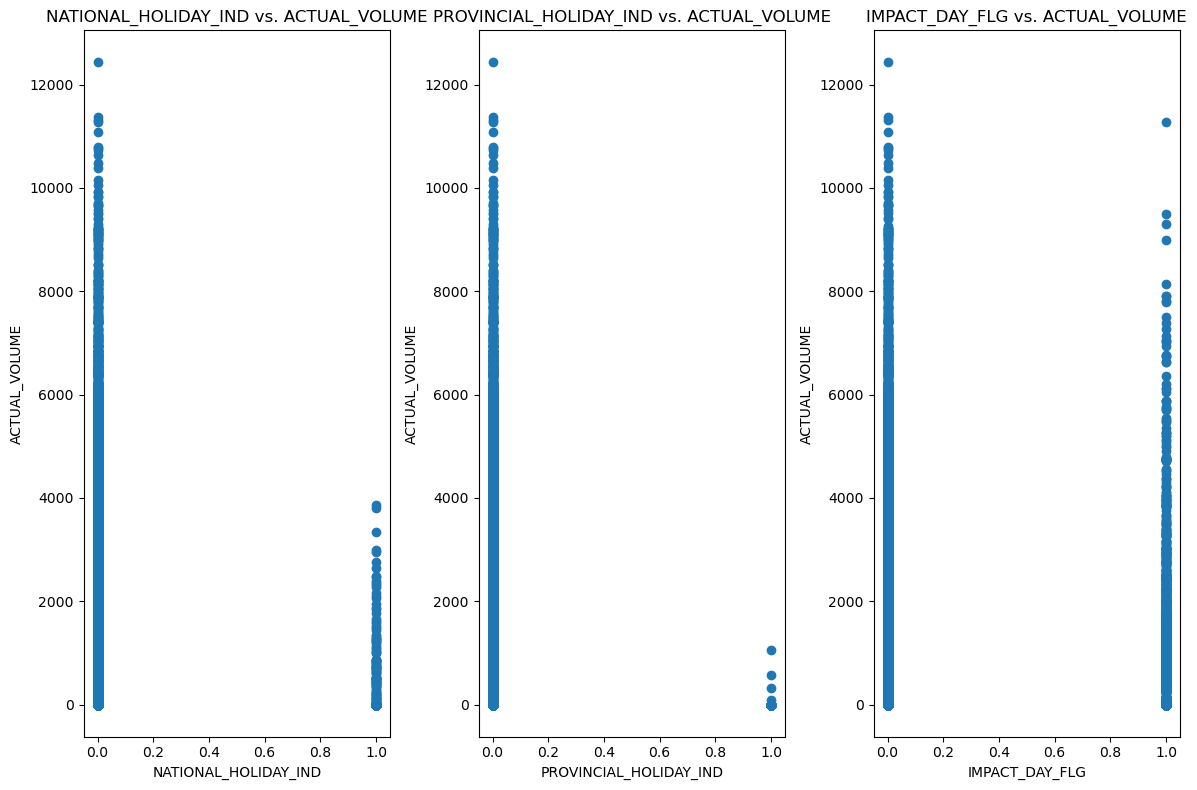

In [26]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plotting against each holiday indicator
plt.figure(figsize=(12, 8))

# Scatter plot for NATIONAL_HOLIDAY_IND vs. ACTUAL_VOLUME
plt.subplot(1, 3, 1)
plt.scatter(df['NATIONAL_HOLIDAY_IND'], df['ACTUAL_VOLUME'])
plt.title('NATIONAL_HOLIDAY_IND vs. ACTUAL_VOLUME')
plt.xlabel('NATIONAL_HOLIDAY_IND')
plt.ylabel('ACTUAL_VOLUME')

# Scatter plot for PROVINCIAL_HOLIDAY_IND vs. ACTUAL_VOLUME
plt.subplot(1, 3, 2)
plt.scatter(df['PROVINCIAL_HOLIDAY_IND'], df['ACTUAL_VOLUME'])
plt.title('PROVINCIAL_HOLIDAY_IND vs. ACTUAL_VOLUME')
plt.xlabel('PROVINCIAL_HOLIDAY_IND')
plt.ylabel('ACTUAL_VOLUME')

# Scatter plot for IMPACT_DAY_FLG vs. ACTUAL_VOLUME
plt.subplot(1, 3, 3)
plt.scatter(df['IMPACT_DAY_FLG'], df['ACTUAL_VOLUME'])
plt.title('IMPACT_DAY_FLG vs. ACTUAL_VOLUME')
plt.xlabel('IMPACT_DAY_FLG')
plt.ylabel('ACTUAL_VOLUME')

plt.tight_layout()
plt.show()
